In [1]:
import pandas as pd
print("Pandas version: {}".format(pd.__version__))
import numpy as np
print("Numpy version: {}".format(np.__version__))
import matplotlib.pyplot as plt
# print("Matplotlib.pyplot version: {}".format(plt.__version__))
import seaborn as sns
print("Seaborn version: {}".format(sns.__version__))

from sklearn.linear_model import LogisticRegression #logistic_reg
from sklearn.ensemble import RandomForestClassifier # rforest
from sklearn.tree import DecisionTreeClassifier # dtree
from sklearn.naive_bayes import GaussianNB # nb
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.svm import SVC, LinearSVC # svm
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import KFold  # k값은 count 로 의미로 이해
from sklearn.model_selection import cross_val_score

Pandas version: 1.0.5
Numpy version: 1.18.5
Seaborn version: 0.10.1


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
titanic_data = pd.concat([train, test])

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 1. Data Information

In [4]:
print('-' * 30 + 'train' + '-' * 30)
train.info()
print('-' * 30 + 'test' + '-' * 30)
test.info()

------------------------------train------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------test------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Col

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print('Train Data Null value :\n', train.isnull().sum())
print('-' * 30)
print('Test Data Null value :\n', test.isnull().sum())

Train Data Null value :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Test Data Null value :
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Train Data Describe

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Test Data Describe

In [10]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## 2. Preprocessing - Null

In [12]:
train_df = train.copy()
test_df = test.copy()

In [13]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Fill Nan

In [14]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
train_df['Age'] = train_df['Age'].astype(int)
# train_age_mean = train_df['Age'].mean()
# train_age_std = train_df['Age'].std()
# train_age_null = train_df['Age'].isnull().sum()
# train_age_random = np.random.randint(train_age_mean - train_age_std, train_age_mean + train_age_std, size = train_age_null)
# train_df['Age'][np.isnan(train_df['Age'])] = train_age_random
# train_df['Age'] = train_df['Age'].astype(int)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
test_df['Age'] = test_df['Age'].astype(int)
# test_age_mean = test_df['Age'].mean()
# test_age_std = test_df['Age'].std()
# test_age_null = test_df['Age'].isnull().sum()
# test_age_random = np.random.randint(test_age_mean - test_age_std, test_age_mean + test_age_std, size = test_age_null)
# test_df['Age'][np.isnan(test_df['Age'])] = test_age_random
# test_df['Age'] = test_df['Age'].astype(int)

test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

### Check Null Data

In [15]:
print('Train Data Null Value :\n', train_df.isnull().sum())
print('Test Data Null Value :\n', test_df.isnull().sum())

Train Data Null Value :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
Test Data Null Value :
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## 3. Preprocessing - Encoder

### (1) Name → Title

In [16]:
train_df['Title'] = train_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test_df['Title'] = train_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr


In [17]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
the Countess      1
Sir               1
Lady              1
Mme               1
Jonkheer          1
Don               1
Capt              1
Ms                1
Name: Title, dtype: int64

In [18]:
train_df['Title'] = train_df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'the Countess',\
                                              'Jonkheer', 'Sir', 'Don', 'Lady'], 'Other')

train_df['Title'] = train_df['Title'].replace(['Mlle','Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

train_df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [19]:
test_df['Title'] = test_df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'the Countess',\
                                              'Jonkheer', 'Sir', 'Don', 'Lady'], 'Other')

test_df['Title'] = test_df['Title'].replace(['Mlle','Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

test_df['Title'].value_counts()

Mr        228
Miss      101
Mrs        59
Master     23
Other       7
Name: Title, dtype: int64

In [20]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}
train_df['Title'] = train_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].map(title_mapping)

### (2) Sex

In [21]:
sex_mapping = {'male':0, 'female':1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0


### (3) Age

In [22]:
train_df['AgeBin'] = pd.cut(train_df['Age'].astype(int), 5)
train_df['AgeBin'].value_counts()

(16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeBin, dtype: int64

In [23]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[train_df['Age'] > 64 , 'Age'] = 4

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[test_df['Age'] > 64 , 'Age'] = 4

### (4) FamilySize

In [24]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + train_df['Parch']

In [25]:
train_df['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

### (5) Alone

In [26]:
# if train_df['FamilySize'] == 0:
#     train_df['Alone'] = 1
# else:
#     train_df['Alone'] = 0
    
# if test_df['FamilySize'] == 0:
#     test_df['Alone'] = 1
# else:
#     test_df['Alone'] = 0

train_df.loc[train_df['FamilySize'] >= 1, 'Alone'] = 0
train_df.loc[train_df['FamilySize'] == 0, 'Alone'] = 1
train_df['Alone'] = train_df['Alone'].astype(int)

test_df.loc[test_df['FamilySize'] >= 1, 'Alone'] =0
test_df.loc[test_df['FamilySize'] == 0, 'Alone'] = 1
test_df['Alone'] = test_df['Alone'].astype(int)

### (6) Fare

In [27]:
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)
train_df['FareBin'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: FareBin, dtype: int64

In [28]:
train_df.loc[train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31.0), 'Fare'] = 2
train_df.loc[train_df['Fare'] > 31.0, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

test_df.loc[test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31.0), 'Fare'] = 2
test_df.loc[test_df['Fare'] > 31.0, 'Fare'] = 3
test_df['Fare'] = test_df['Fare'].astype(int)

### (7) Embarked

In [29]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin,FamilySize,Alone,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,2,0,"(16.0, 32.0]",1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,0,2,"(32.0, 48.0]",1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,2,1,"(16.0, 32.0]",0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,2,2,"(32.0, 48.0]",1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,2,0,"(32.0, 48.0]",0,1,"(7.91, 14.454]"


## 4. Preprocessing - Drop Feature (1)

In [32]:
train_drop_column = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'AgeBin', 'FamilySize', 'FareBin']
test_drop_column = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train_df.drop(train_drop_column, axis = 1, inplace = True)
test_df.drop(test_drop_column, axis = 1, inplace = True)

## 5. HeatMap

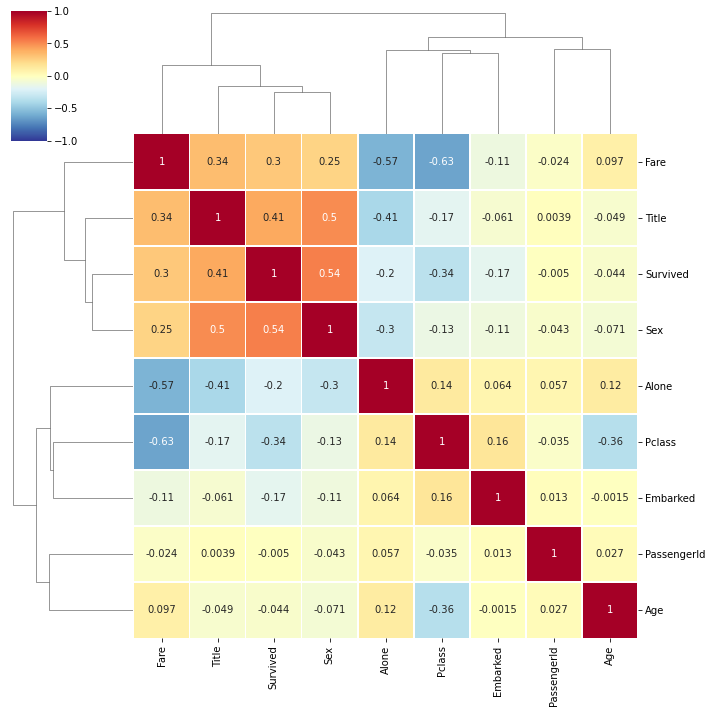

In [33]:
make_corr = train_df.corr()
sns.clustermap(make_corr, annot = True, cmap = 'RdYlBu_r', linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1, vmax = 1)
plt.show()

## 6. Preprocessing - Drop Feature (2)

In [34]:
train_drop_column = ['Age']
test_drop_column = ['Age']
train_df.drop(train_drop_column, axis = 1, inplace = True)
test_df.drop(test_drop_column, axis = 1, inplace = True)

# Model

In [35]:
X_train = train_df.drop(['Survived', 'PassengerId'], axis = 1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis = 1)

In [36]:
X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [37]:
X_train

,Pclass,Sex,Fare,Embarked,Title,Alone
0,3,0,0,2,0,0
1,1,1,3,0,2,0
2,3,1,1,2,1,1
3,1,1,3,2,2,0
4,3,0,1,2,0,1
...,...,...,...,...,...,...
886,2,0,1,2,4,1
887,1,1,2,2,1,1
888,3,1,2,2,1,0
889,1,0,2,0,0,1


In [38]:
X_test

,Pclass,Sex,Fare,Embarked,Title,Alone
0,3,0,0,1,0,1
1,3,1,0,2,2,0
2,2,0,1,1,1,1
3,3,0,1,2,2,1
4,3,1,1,2,0,0
...,...,...,...,...,...,...
413,3,0,1,2,0,1
414,1,1,3,0,0,1
415,3,0,0,2,2,1
416,3,0,1,2,2,0


In [39]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### (1) Logistic Regression

In [40]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)
acc_logistic = round(logistic_reg.score(X_train, y_train) * 100, 2)
acc_logistic

79.12

In [41]:
logistic_reg = LogisticRegression()
score = cross_val_score(logistic_reg, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_logistic_val = round(np.mean(score) * 100, 2)
acc_logistic_val

78.23

### (2-1) SVC

In [42]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

82.94

In [43]:
svc = SVC()
score = cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_svc_val = round(np.mean(score) * 100, 2)
acc_svc_val

81.48

### (2-2) Linear SVC

In [44]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_linear_svc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

78.11

In [45]:
linear_svc = LinearSVC()
score = cross_val_score(linear_svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_linear_svc_val = round(np.mean(score) * 100, 2)
acc_linear_svc_val

78.23

### (3) RandomForest

In [46]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)
acc_rforest = round(rforest.score(X_train, y_train) * 100, 2)
acc_rforest

84.29

In [47]:
rforest = RandomForestClassifier()
score = cross_val_score(rforest, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_rforest_val = round(np.mean(score) * 100, 2)
acc_rforest_val

79.68

### (4) DecisionTreeClassifier

In [48]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
acc_dtree = round(dtree.score(X_train, y_train) * 100, 2)
acc_dtree

84.29

In [49]:
dtree = DecisionTreeClassifier()
score = cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_dtree_val = round(np.mean(score) * 100, 2)
acc_dtree_val

79.35

### (5) Gaussian Naive Bayes

In [50]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = round(nb.score(X_train, y_train) * 100, 2)
acc_nb

76.77

In [51]:
nb = GaussianNB()
score = cross_val_score(nb, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_nb_val = round(np.mean(score) * 100, 2)
acc_nb_val

74.74

### (6) KneighborsClassifier

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

80.92

In [53]:
knn = KNeighborsClassifier()
score = cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_knn_val = round(np.mean(score) * 100, 2)
acc_knn_val

76.77

### (7) Perceptron

In [54]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

77.67

In [55]:
perceptron = Perceptron()
score = cross_val_score(perceptron, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_perceptron_val = round(np.mean(score) * 100, 2)
acc_perceptron_val

69.82

### (8) Stochastic Gradient Descent (SGD)

In [56]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

80.13

In [57]:
sgd = SGDClassifier()
score = cross_val_score(sgd, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
acc_sgd_val = round(np.mean(score) * 100, 2)
acc_sgd_val

70.25

## 2. Model Evaluation

In [58]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'Random Forest', 'Decision Tree', 'Naive Bayes', 'KNN',  
              'Perceptron', 'Stochastic Gradient Decent'],
    'Score': [acc_logistic, acc_svc, acc_linear_svc, acc_rforest, acc_dtree, 
              acc_nb, acc_knn, acc_perceptron, acc_sgd]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
3,Random Forest,84.29
4,Decision Tree,84.29
1,Support Vector Machines,82.94
6,KNN,80.92
8,Stochastic Gradient Decent,80.13
0,Logistic Regression,79.12
2,Linear SVC,78.11
7,Perceptron,77.67
5,Naive Bayes,76.77


In [59]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'Random Forest', 'Decision Tree', 'Naive Bayes', 'KNN',  
              'Perceptron', 'Stochastic Gradient Decent'],
    'Score': [acc_logistic_val, acc_svc_val, acc_linear_svc_val, acc_rforest_val, 
              acc_dtree_val, acc_nb_val, acc_knn_val, acc_perceptron_val, acc_sgd_val]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
1,Support Vector Machines,81.48
3,Random Forest,79.68
4,Decision Tree,79.35
0,Logistic Regression,78.23
2,Linear SVC,78.23
6,KNN,76.77
5,Naive Bayes,74.74
8,Stochastic Gradient Decent,70.25
7,Perceptron,69.82


In [60]:
submission = pd.DataFrame({
    "PassengerId": test_df['PassengerId'],
    "Survived": y_pred_rforest
})
submission.to_csv("data/submission_v5.csv", index = False)

In [61]:
# submission = pd.DataFrame({
#     "PassengerId": test_df['PassengerId'],
#     "Survived": y_pred_svc
# })
# submission.to_csv("data/submission_v3.csv", index = False)